# Remote Work Analysis
The following is an analysis of a dataset from Kaggle. This analysis has several aims:
- Is someone onsite / remote situation a factor in any negative outcomes?
- Is someone's work life balance affected by their ability to be remote or not?
- Can burnout level be correlated with any factors?
- Are certain industries a factor in negative outcomes?

### Kaggle information
Link: https://www.kaggle.com/datasets/kshitijsaini121/remote-work-of-health-impact-survey-june-2025    

Survey_Date Date when the survey response was submitted (YYYY-MM-DD) 2025-06-01    
Age Age of the respondent (in years) 27, 52, 40    
Gender Gender identity of the respondent Female, Male, Non-binary, Prefer not to say    
Region Geographical region of employment Asia, Europe, North America, Africa, Oceania    
Industry Industry sector of the respondent Technology, Manufacturing, Finance, Healthcare    
Job_Role Specific job title or function Data Analyst, HR Manager, Software Engineer    
Work_Arrangement Primary work mode Onsite, Remote, Hybrid    
Hours_Per_Week Average number of hours worked per week 36, 55, 64    
Mental_Health_Status Primary self-reported mental health condition Anxiety, Burnout, Depression, None, PTSD    
Burnout_Level Self-assessed burnout (categorical: Low, Medium, High) High, Medium, Low    
Work_Life_Balance_Score Self-rated work-life balance on a scale of 1 (poor) to 5 (excellent) 1, 3, 5    
Physical_Health_Issues Self-reported physical health complaints (semicolon-separated if multiple) Back Pain; Eye Strain; Neck Pain; None    
Social_Isolation_Score Self-rated social isolation on a scale of 1 (none) to 5 (severe) 1, 2, 5    
Salary_Range Annual salary range in USD $40K-60K, $80K-100K, $120K+    

In [1]:
import cyber_tables
from matplotlib import pyplot as plt

In [2]:
# Load the CSV into memory as a CyberTable
file = r"E:\Websites\Cyber Dragon\project_area\data_analysis\no_pandas\post_pandemic_remote_work_health_impact_2025.csv"
cyber_table = cyber_tables.open_csv(file)

In [3]:
# Print the columns for reference
cyber_table.reset_column_indexes()
cyber_table.print_columns()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: string

In [4]:
# Show a random selection of 5 rows
cyber_table.random_selection(5)


Printing 5 random rows
Survey_Date |  Age |  Gender |  Region |  Industry |  Job_Role |  Work_Arrangement |  Hours_Per_Week |  Mental_Health_Status |  Burnout_Level |  Work_Life_Balance_Score |  Physical_Health_Issues |  Social_Isolation_Score |  Salary_Range
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2025-06-03 |  36 | Female | Africa | Customer Service | UX Designer | Hybrid           |             61 | Stress Disorder      | Medium        |                       1 | Shoulder Pain; Eye Strain; Neck Pain |                      2 | $80K-100K   
2025-06-04 |  64 | Female | Africa | Marketing | Product Manager | Remote           |             60 | PTSD                 | High          |                       3 | Shoulder Pain; Wrist Pain |                      3 | $80K-100K   
2025-06-22 |  63 | F

In [5]:
cyber_table.set_category_properties(column_index=9, categories=["Low", "Medium", "High"])

### Correlation testing
Finding potential correlations to show potentially linked data    

In [6]:
cyber_table.find_meantingful_correlations()

List of all meaningful correlations found in numerical columns

Columns: Age and Work_Life_Balance_Score coeffecient: -0.02252993766245021
Columns: Hours_Per_Week and Work_Life_Balance_Score coeffecient: -0.014883508050023605
Columns: Work_Life_Balance_Score and Age coeffecient: -0.02252993766245021
Columns: Work_Life_Balance_Score and Hours_Per_Week coeffecient: -0.014883508050023605


### Investigation: Work life balance
Do people who work less hours per week, or have a hybrid or remote position report a better work life balance than those who are fully onsite?    

In [7]:
work_life_balance = cyber_table.return_sub_table_by_columns([1, 6, 7, 10])
work_life_balance.random_selection(10)
work_life_balance.print_columns()


Printing 10 random rows
Age |  Work_Arrangement |  Hours_Per_Week |  Work_Life_Balance_Score
--------------------------------------------------------------------
 62 | Onsite           |             49 |                       5
 31 | Onsite           |             45 |                       4
 50 | Hybrid           |             65 |                       2
 48 | Onsite           |             53 |                       3
 59 | Hybrid           |             41 |                       4
 62 | Onsite           |             57 |                       2
 31 | Hybrid           |             42 |                       2
 56 | Onsite           |             60 |                       4
 34 | Remote           |             47 |                       3
 22 | Onsite           |             55 |                       4

Printing columns
Index: 0, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 1, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, I

In [8]:
agg_work_life_balance = work_life_balance.aggregate(reference_column_indexes=[1], calculation_column_indexes=[0,2,3], calculations=["median","mean","mean"] )
agg_work_life_balance.print()
agg_work_life_balance.print_columns()


Printing all rows
Work_Arrangement |  Age_median |  Hours_Per_Week_mean |  Work_Life_Balance_Score_mean
-------------------------------------------------------------------------------------
Hybrid           | 44         |   49.84607745779543 |           2.9483614697120157
Onsite           | 44.0       |  49.955185659411015 |            3.028809218950064
Remote           | 45.0       |   49.87244897959184 |            2.993197278911565

Printing columns
Index: 0, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 1, Name: Age_median, Data Type: string, Unlocked: True, Longest value: 10, Is Category: False, Categories: {}
Index: 2, Name: Hours_Per_Week_mean, Data Type: decimal, Unlocked: True, Longest value: 19
Index: 3, Name: Work_Life_Balance_Score_mean, Data Type: decimal, Unlocked: True, Longest value: 28


It would appear that there is virtually no difference between the work arrangement and work life balance.    
Next to test the correlation results: age vs work life balance, and hours per week and work life balance.     

In [9]:
agg_work_life_balance_hours = work_life_balance.aggregate(reference_column_indexes=[3], calculation_column_indexes=[2, 0], calculations=["median", "median"] )
agg_work_life_balance_hours.print()
agg_work_life_balance_hours.print_columns()


Printing all rows
Work_Life_Balance_Score |  Hours_Per_Week_median |  Age_median
--------------------------------------------------------------
                      1 | 51.0                  | 46.0      
                      2 | 50.0                  | 44.0      
                      3 | 50                    | 43        
                      4 | 49                    | 44        
                      5 | 50                    | 44        

Printing columns
Index: 0, Name: Work_Life_Balance_Score, Data Type: int, Unlocked: True, Longest value: 23
Index: 1, Name: Hours_Per_Week_median, Data Type: string, Unlocked: True, Longest value: 21, Is Category: False, Categories: {}
Index: 2, Name: Age_median, Data Type: string, Unlocked: True, Longest value: 10, Is Category: False, Categories: {}


In [10]:
agg_work_life_balance_age = work_life_balance.aggregate(reference_column_indexes=[0], calculation_column_indexes=[3,2], calculations=["mean","mean"])
agg_work_life_balance_age.print()
agg_work_life_balance_age.print_columns()


Printing all rows
Age |  Work_Life_Balance_Score_mean |  Hours_Per_Week_mean
----------------------------------------------------------
 22 |           3.1944444444444446 |   49.81944444444444
 23 |            3.227272727272727 |   51.74242424242424
 24 |            2.951219512195122 |   50.73170731707317
 25 |            3.183333333333333 |   48.46666666666667
 26 |           2.9705882352941178 |   48.63235294117647
 27 |           3.0240963855421685 |   50.72289156626506
 28 |           3.0172413793103448 |   50.44827586206897
 29 |           3.1666666666666665 |   49.13636363636363
 30 |                         3.08 |  49.626666666666665
 31 |                        3.025 |             48.4375
 32 |            3.246153846153846 |   51.04615384615385
 33 |            2.739130434782609 |   49.43478260869565
 34 |           3.1549295774647885 |   48.87323943661972
 35 |                          2.6 |                49.0
 36 |           2.7333333333333334 |   49.89333333333333
 37 |   

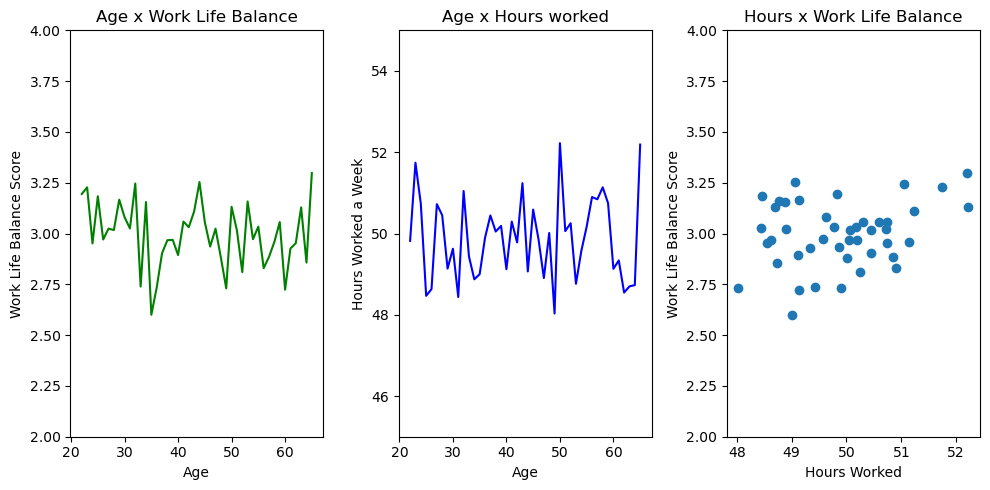

In [11]:
age = agg_work_life_balance_age.return_column_data(0)
wlb = agg_work_life_balance_age.return_column_data(1)
hours = agg_work_life_balance_age.return_column_data(2)

wlb_fig = plt.figure(figsize=(10,5))
ax1 = wlb_fig.add_subplot(1,3,1)
ax1.plot(age, wlb, color="green")
ax1.set_ylim(2,4)
ax1.set_ylabel("Work Life Balance Score")
ax1.set_xlabel("Age")
ax1.set_title("Age x Work Life Balance")

ax2 = wlb_fig.add_subplot(1,3,2)
ax2.plot(age, hours, color="blue")
ax2.set_ylim(45,55)
ax2.set_ylabel("Hours Worked a Week")
ax2.set_xlabel("Age")
ax2.set_title("Age x Hours worked")

ax3 = wlb_fig.add_subplot(1,3,3)
ax3.scatter(hours, wlb)
ax3.set_title("Hours x Work Life Balance")
ax3.set_xlabel("Hours Worked")
ax3.set_ylabel("Work Life Balance Score")
ax3.set_ylim(2,4)

plt.tight_layout()
plt.show()

There may have been a slight correlation between:    
Columns: Age and Work_Life_Balance_Score coeffecient: -0.02252993766245021     
Columns: Hours_Per_Week and Work_Life_Balance_Score coeffecient: -0.014883508050023605    

It doesn't look like there's much of any correlation between any of these values besides a weak correlation that the more hours you work, the better your work-life-balance. Perhaps controlling for industry or job title may paint a better picture.    

### Testing values against work life balance scores
Next, I'll be testing some column associations visually when controlling for the onsite, remote and hybrid categories.    

In [12]:
cyber_table.print_columns()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: string

### Adding extra columns:
- number to signify the burnout level

In [13]:
cyber_table.insert_column("Burnout_Int")

14

In [14]:
for idx, row in cyber_table.rows.items():
    items = row.get_items()
    burnout_value = items[9]
    if burnout_value == "Low": val = 1
    elif burnout_value == "Medium": val = 2
    elif burnout_value == "High": val = 3
    else: val = 0
    items[14] = val
    cyber_table.update_row(idx, items)

In [15]:
def mean(input_list:list):
    num = len(input_list)
    total = 0
    for item in input_list:
        total += item
    return total / num

In [16]:
# Onsite
onsite = cyber_table.return_sub_table_by_row_filters(column_indexes=[6], values=["Onsite"])
onsite_test_1_2 = onsite.aggregate(reference_column_indexes=[7], command_dict={12:"mean", 10:"mean"})
onsite_burnout_isolation = onsite.aggregate(reference_column_indexes=[9, 14], command_dict={7:"mean"})
onsite_burnout_isolation.order_rows_by_column(1, "desc")
onsite_burnout_isolation.print()

onsite_hours = onsite_test_1_2.return_column_data(0)
onsite_isolation = onsite_test_1_2.return_column_data(1)
onsite_wlb = onsite_test_1_2.return_column_data(2)

onsite_burnout = onsite_burnout_isolation.return_column_data(0)
onsite_burnout_hours = onsite_burnout_isolation.return_column_data(2)

# Hybrid
hybrid = cyber_table.return_sub_table_by_row_filters(column_indexes=[6], values=["Hybrid"])
hybrid_test_1_2 = hybrid.aggregate(reference_column_indexes=[7], command_dict={12:"mean", 10:"mean"})
hybrid_burnout_isolation = hybrid.aggregate(reference_column_indexes=[9, 14], command_dict={7:"mean"})
hybrid_burnout_isolation.order_rows_by_column(1, "desc")
hybrid_burnout_isolation.print()

hybrid_hours = hybrid_test_1_2.return_column_data(0)
hybrid_isolation = hybrid_test_1_2.return_column_data(1)
hybrid_wlb = hybrid_test_1_2.return_column_data(2)

hybrid_burnout = hybrid_burnout_isolation.return_column_data(0)
hybrid_burnout_hours = hybrid_burnout_isolation.return_column_data(2)

# Remote
remote = cyber_table.return_sub_table_by_row_filters(column_indexes=[6], values=["Remote"])
remote_test_1_2 = remote.aggregate(reference_column_indexes=[7], command_dict={12:"mean", 10:"mean"})
remote_burnout_isolation = remote.aggregate(reference_column_indexes=[9, 14], command_dict={7:"mean"})
remote_burnout_isolation.order_rows_by_column(1, "desc")
remote_burnout_isolation.print()

remote_hours = remote_test_1_2.return_column_data(0)
remote_isolation = remote_test_1_2.return_column_data(1)
remote_wlb = remote_test_1_2.return_column_data(2)

remote_burnout = remote_burnout_isolation.return_column_data(0)
remote_burnout_hours = remote_burnout_isolation.return_column_data(2)



Printing all rows
Burnout_Level |  Burnout_Int |  Hours_Per_Week_mean
---------------------------------------------------
Low           |           1 |   50.07218683651805
Medium        |           2 |   49.81120943952802
High          |           3 |   50.05811138014528

Printing all rows
Burnout_Level |  Burnout_Int |  Hours_Per_Week_mean
---------------------------------------------------
Low           |           1 |   50.62176165803109
Medium        |           2 |   49.75550660792952
High          |           3 |  49.544444444444444

Printing all rows
Burnout_Level |  Burnout_Int |  Hours_Per_Week_mean
---------------------------------------------------
Low           |           1 |   48.95061728395062
Medium        |           2 |   50.31196581196581
High          |           3 |   49.76923076923077


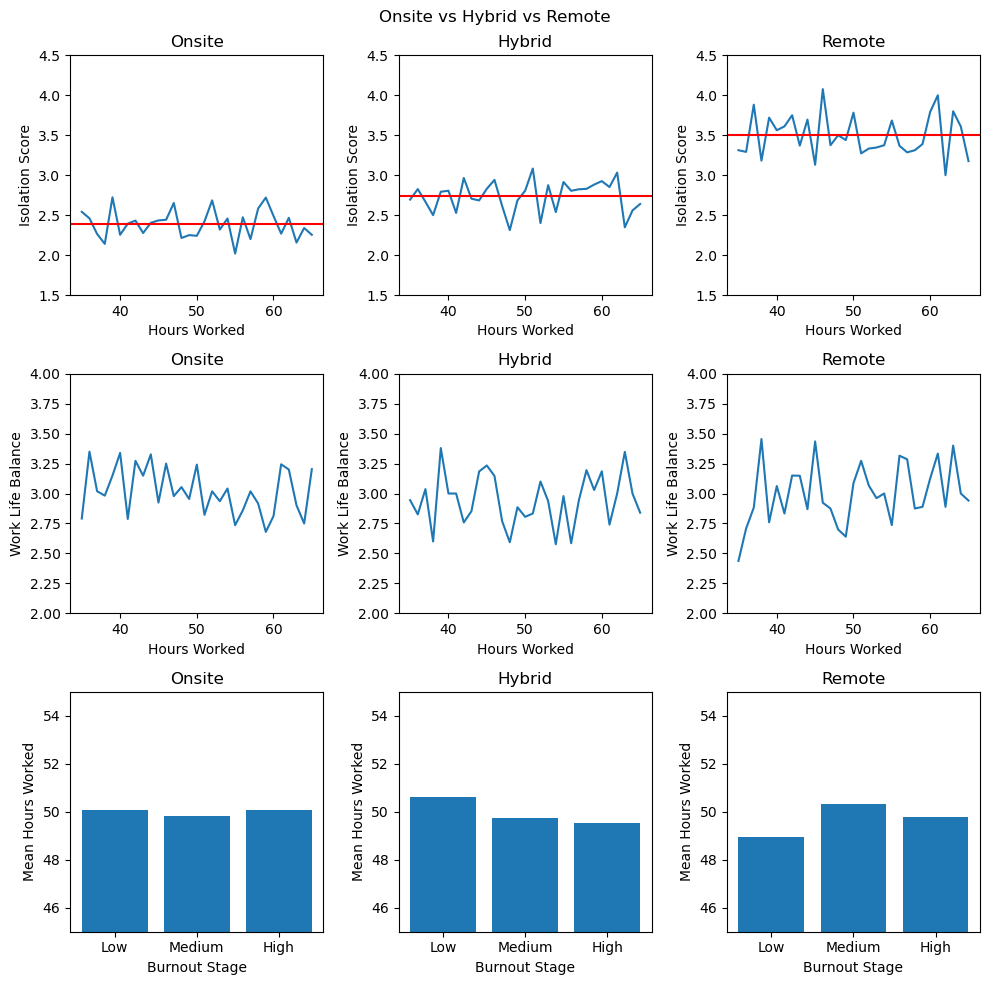

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Onsite vs Hybrid vs Remote")

ax1 = fig.add_subplot(3,3,1)
ax1.plot(onsite_hours, onsite_isolation)
ax1.set_xlabel("Hours Worked")
ax1.set_ylabel("Isolation Score")
ax1.set_title("Onsite")
ax1.axhline(mean(onsite_isolation), color="red")
ax1.set_ylim(1.5,4.5)

ax2 = fig.add_subplot(3,3,2)
ax2.plot(hybrid_hours, hybrid_isolation)
ax2.set_xlabel("Hours Worked")
ax2.set_ylabel("Isolation Score")
ax2.set_title("Hybrid")
ax2.axhline(mean(hybrid_isolation), color="red")
ax2.set_ylim(1.5,4.5)

ax3 = fig.add_subplot(3,3,3)
ax3.plot(remote_hours, remote_isolation)
ax3.set_xlabel("Hours Worked")
ax3.set_ylabel("Isolation Score")
ax3.set_title("Remote")
ax3.set_ylim(1.5,4.5)
ax3.axhline(mean(remote_isolation), color="red")

ax4 = fig.add_subplot(3,3,4)
ax4.plot(onsite_hours, onsite_wlb)
ax4.set_xlabel("Hours Worked")
ax4.set_ylabel("Work Life Balance")
ax4.set_title("Onsite")
ax4.set_ylim(2,4)

ax5 = fig.add_subplot(3,3,5)
ax5.plot(hybrid_hours, hybrid_wlb)
ax5.set_xlabel("Hours Worked")
ax5.set_ylabel("Work Life Balance")
ax5.set_title("Hybrid")
ax5.set_ylim(2,4)

ax6 = fig.add_subplot(3,3,6)
ax6.plot(remote_hours, remote_wlb)
ax6.set_xlabel("Hours Worked")
ax6.set_ylabel("Work Life Balance")
ax6.set_title("Remote")
ax6.set_ylim(2,4)

ax7 = fig.add_subplot(3,3,7)
ax7.bar(onsite_burnout, onsite_burnout_hours)
ax7.set_xlabel("Burnout Stage")
ax7.set_ylabel("Mean Hours Worked")
ax7.set_title("Onsite")
ax7.set_ylim(45,55)

ax8 = fig.add_subplot(3,3,8)
ax8.bar(hybrid_burnout, hybrid_burnout_hours)
ax8.set_xlabel("Burnout Stage")
ax8.set_ylabel("Mean Hours Worked")
ax8.set_title("Hybrid")
ax8.set_ylim(45,55)

ax9 = fig.add_subplot(3,3,9)
ax9.bar(remote_burnout, remote_burnout_hours)
ax9.set_xlabel("Burnout Stage")
ax9.set_ylabel("Mean Hours Worked")
ax9.set_title("Remote")
ax9.set_ylim(45,55)

plt.tight_layout()
plt.show()


The only comparrison that looks like a difference in conditions is that people who are fully remote vs fully onsite, feel more socially isolated. This shift is also seen in the hybrid roles.    
Hours worked for onsite, hybrid and remote, as well as the burnout severity for hours worked didn't seem to have any effect.

### Next observation
Is social isolation associated with an increase in burnout, mental or physical health issues, and does age or gender make a difference?

In [18]:
cyber_table.print_columns()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 17, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 13, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 21, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 28, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: st


Printing all rows
Burnout_Level |  Burnout_Int |  Social_Isolation_Score_mean
-----------------------------------------------------------
Low           |           1 |          2.6228187919463086
Medium        |           2 |            2.70497803806735
High          |           3 |           2.762906309751434


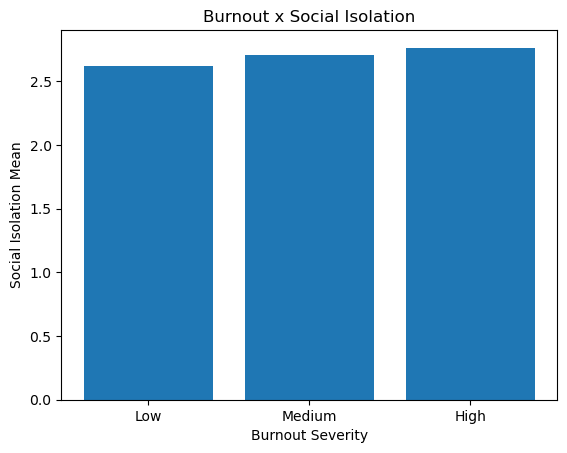

In [19]:
burnout = cyber_table.aggregate(reference_column_indexes=[9, 14], command_dict={12:"mean"})
burnout.order_rows_by_column(2)
burnout.print()

levels = burnout.return_column_data(0)
isolation_mean = burnout.return_column_data(2)

plt.bar(levels, isolation_mean)
plt.title("Burnout x Social Isolation")
plt.xlabel("Burnout Severity")
plt.ylabel("Social Isolation Mean")
plt.show()

The amount of social isolation someone feels does not appear linked to their level of burnout

In [20]:
physical_health = cyber_table.return_column_data(11)

In [21]:
cyber_table.insert_column("physical_conditions")

15

In [22]:
for idx, row in cyber_table.rows.items():
    items = row.get_items()
    physical = items[11]
    count = len(str(physical).split(";"))
    if physical is None or str(physical) == "None":
        count = 0
    items[15] = count    
    cyber_table.update_row(idx, items)
cyber_table.analyse_columns()

In [23]:
physical_health = cyber_table.return_sub_table_by_columns([11, 15])
physical_health.top(10)


Printing top 10 rows
                  Physical_Health_Issues                   |  physical_conditions
---------------------------------------------------------------------------------
Shoulder Pain; Neck Pain                                    |                   2
Back Pain                                                   |                   1
Shoulder Pain; Eye Strain                                   |                   2
Shoulder Pain; Eye Strain                                   |                   2
None                                                        |                   0
Back Pain; Shoulder Pain                                    |                   2
Back Pain; Shoulder Pain; Wrist Pain                        |                   3
None                                                        |                   0
Neck Pain                                                   |                   1
Back Pain                                                   |               

In [24]:
cyber_table.return_distinct_column_values(8)

['ADHD', 'Anxiety', 'Burnout', 'Depression', 'None', 'PTSD', 'Stress Disorder']


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 17, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 13, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 21, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 28, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: st

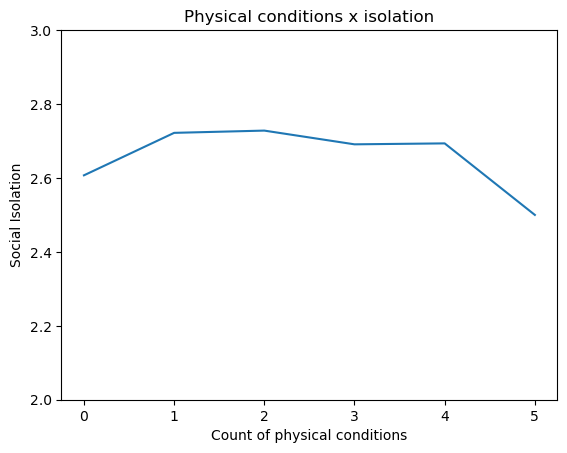

In [25]:
cyber_table.print_columns()

social_x_physical = cyber_table.aggregate(reference_column_indexes=[15], command_dict={12:"mean"})

social = social_x_physical.return_column_data(0)
phys = social_x_physical.return_column_data(1)

plt.plot(social, phys)
plt.title("Physical conditions x isolation")
plt.xlabel("Count of physical conditions")
plt.ylabel("Social Isolation")
plt.ylim(2,3)
plt.show()


Printing all rows
Mental_Health_Status |  Burnout_Level_mode |  Social_Isolation_Score_mean
-------------------------------------------------------------------------
ADHD                 | Medium             |          2.6441558441558444
Anxiety              | Medium             |           2.700507614213198
Burnout              | Medium             |           2.520408163265306
Depression           | Medium             |           2.784974093264249
None                 | Medium             |           2.748435544430538
PTSD                 | Medium             |          2.8463356973995273
Stress Disorder      | Medium             |          2.6296296296296298


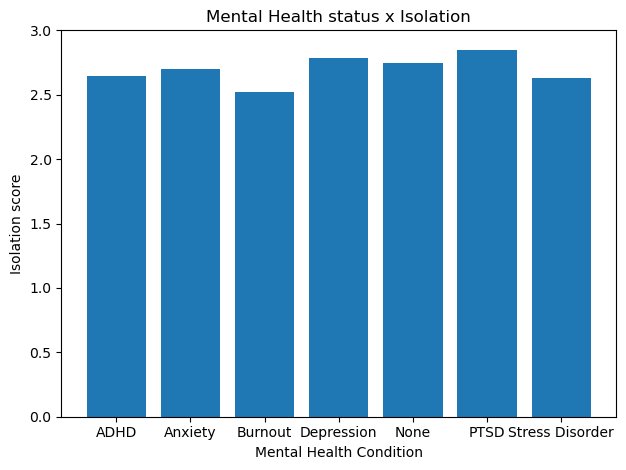

In [26]:
mental_x_isolation = cyber_table.aggregate(reference_column_indexes=[8], command_dict={9:"mode", 12:"mean"})
mental_x_isolation.print()

mental = mental_x_isolation.return_column_data(0)
mental_iso = mental_x_isolation.return_column_data(2)

plt.bar(mental, mental_iso)
plt.title("Mental Health status x Isolation")
plt.xlabel("Mental Health Condition")
plt.ylabel("Isolation score")
plt.ylim(0,3)
plt.tight_layout()
plt.show()

In [27]:
cyber_table.print_columns()

gender = cyber_table.aggregate(reference_column_indexes=[2, 6], command_dict={12:"mean", 15:"mean", 4:"mode", 8:"mode", 0:"row_counts"})
gender_filtered = gender.return_sub_table_by_row_filters(column_indexes=[0], values=[["!=", "Prefer not to say"]])
gender_filtered.print()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 17, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 13, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 21, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 28, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: st

In [28]:
gender_onsite = gender_filtered.return_sub_table_by_row_filters(column_indexes=[1], values=["Onsite"])
gender_hybrid = gender_filtered.return_sub_table_by_row_filters(column_indexes=[1], values=["Hybrid"])
gender_remote = gender_filtered.return_sub_table_by_row_filters(column_indexes=[1], values=["Remote"])

gender_onsite.print()
gender_hybrid.print()
gender_remote.print()


Printing all rows
Gender |  Work_Arrangement |  Social_Isolation_Score_mean |  physical_conditions_mean |  Industry_mode |  Mental_Health_Status_mode |  Survey_Date_row_counts
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Female | Onsite           |           2.389896373056995 |        1.883419689119171 | Professional Services | None                      |                    772
Male   | Onsite           |          2.3674863387978142 |       1.8866120218579234 | Professional Services | None                      |                    732
Non-binary | Onsite           |          2.3863636363636362 |       1.9318181818181819 | Professional Services | Anxiety                   |                     44

Printing all rows
Gender |  Work_Arrangement |  Social_Isolation_Score_mean |  physical_conditions_mean |  Industry_mode |  Mental_Health_Status_mode |  Survey_Date_row_counts
----

In [29]:
onsite_genders = gender_onsite.return_column_data(0)
hybrid_genders = gender_hybrid.return_column_data(0)
remote_genders = gender_remote.return_column_data(0)

onsite_isolation = gender_onsite.return_column_data(2)
hybrid_isolation = gender_hybrid.return_column_data(2)
remote_isolation = gender_remote.return_column_data(2)

onsite_conditions = gender_onsite.return_column_data(3)
hybrid_conditions = gender_hybrid.return_column_data(3)
remote_conditions = gender_remote.return_column_data(3)


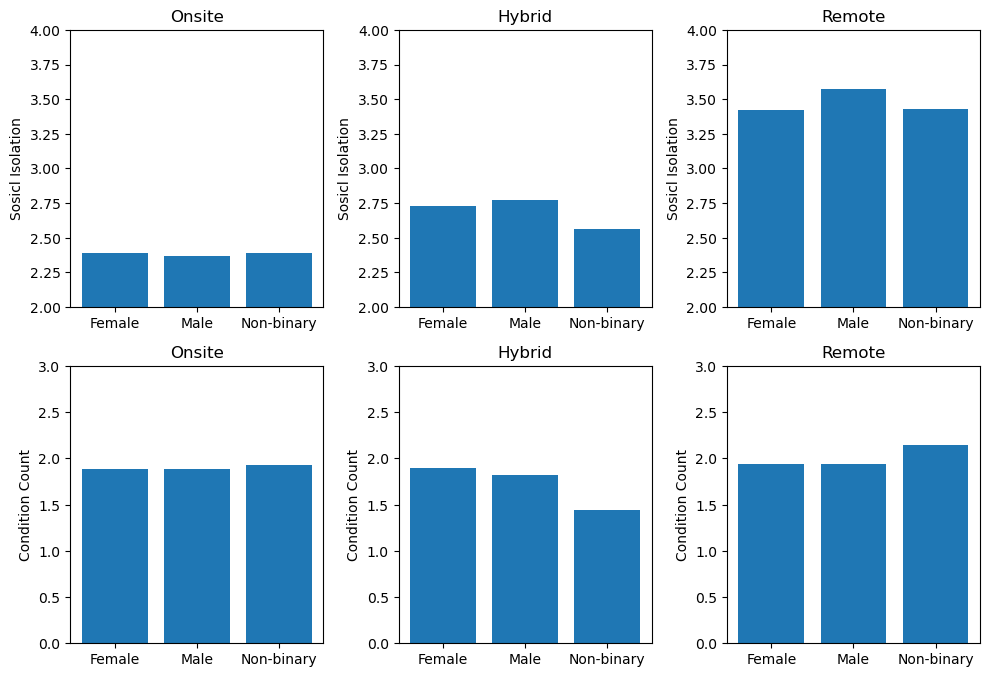

In [30]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax1.bar(onsite_genders, onsite_isolation)
ax1.set_ylim(2,4)
ax1.set_title("Onsite")
ax1.set_ylabel("Sosicl Isolation")

ax2 = fig.add_subplot(3,3,2)
ax2.bar(hybrid_genders, hybrid_isolation)
ax2.set_ylim(2,4)
ax2.set_title("Hybrid")
ax2.set_ylabel("Sosicl Isolation")

ax3 = fig.add_subplot(3,3,3)
ax3.bar(remote_genders, remote_isolation)
ax3.set_ylim(2,4)
ax3.set_title("Remote")
ax3.set_ylabel("Sosicl Isolation")

ax4 = fig.add_subplot(3,3,4)
ax4.bar(onsite_genders, onsite_conditions)
ax4.set_title("Onsite")
ax4.set_ylim(0,3)
ax4.set_ylabel("Condition Count")

ax5 = fig.add_subplot(3,3,5)
ax5.bar(hybrid_genders, hybrid_conditions)
ax5.set_title("Hybrid")
ax5.set_ylim(0,3)
ax5.set_ylabel("Condition Count")

ax6 = fig.add_subplot(3,3,6)
ax6.bar(remote_genders, remote_conditions)
ax6.set_title("Remote")
ax6.set_ylim(0,3)
ax6.set_ylabel("Condition Count")

plt.tight_layout()
plt.show()

In [31]:
mental_x_iso = cyber_table.aggregate(reference_column_indexes=[8, 6], command_dict={12:"mean"})
mental_x_iso.order_rows_by_column(1)
mental_x_iso.print()


Printing all rows
Mental_Health_Status |  Work_Arrangement |  Social_Isolation_Score_mean
-----------------------------------------------------------------------
ADHD                 | Hybrid           |                        2.75
Anxiety              | Hybrid           |           2.721311475409836
Burnout              | Hybrid           |          2.6557377049180326
Depression           | Hybrid           |          2.7851239669421486
None                 | Hybrid           |          2.7761194029850746
PTSD                 | Hybrid           |           3.007751937984496
Stress Disorder      | Hybrid           |          2.4615384615384617
ADHD                 | Onsite           |          2.2688172043010755
Anxiety              | Onsite           |          2.3654822335025383
Burnout              | Onsite           |           2.130434782608696
Depression           | Onsite           |          2.4242424242424243
None                 | Onsite           |          2.44565217391304

In [32]:
onsite_mental = mental_x_iso.return_sub_table_by_row_filters(column_indexes=[1], values=["Onsite"])
hybrid_mental = mental_x_iso.return_sub_table_by_row_filters(column_indexes=[1], values=["Hybrid"])
remote_mental = mental_x_iso.return_sub_table_by_row_filters(column_indexes=[1], values=["Remote"])

onsite_mental_names = onsite_mental.return_column_data(0)
hybrid_mental_names = hybrid_mental.return_column_data(0)
remote_mental_names = remote_mental.return_column_data(0)

onsite_mental_scores = onsite_mental.return_column_data(2)
hybrid_mental_scores = hybrid_mental.return_column_data(2)
remote_mental_scores = remote_mental.return_column_data(2)

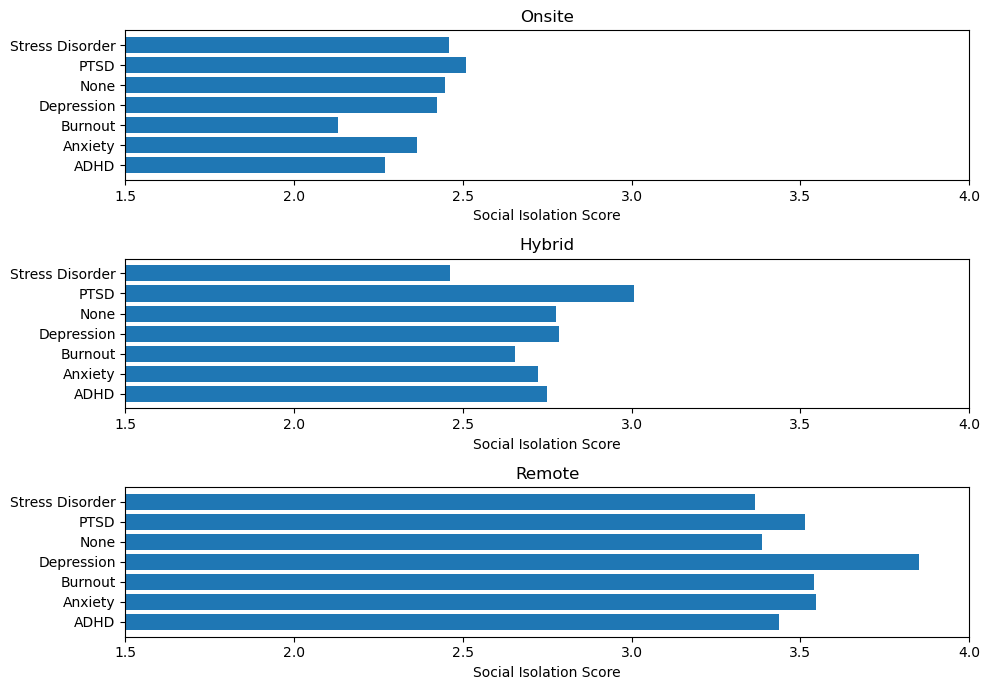

In [33]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(3,1,1)
ax1.barh(onsite_mental_names, onsite_mental_scores)
ax1.set_title("Onsite")
ax1.set_xlim(1.5, 4)
ax1.set_xlabel("Social Isolation Score")

ax2 = fig.add_subplot(3,1,2)
ax2.barh(hybrid_mental_names, hybrid_mental_scores)
ax2.set_title("Hybrid")
ax2.set_xlabel("Social Isolation Score")
ax2.set_xlim(1.5, 4)

ax3 = fig.add_subplot(3,1,3)
ax3.barh(remote_mental_names, remote_mental_scores)
ax3.set_title("Remote")
ax3.set_xlabel("Social Isolation Score")
ax3.set_xlim(1.5, 4)

plt.tight_layout()
plt.show()

It would appear from the last tests that people who work from home more are more likely to:
1) Feel more socially isolated
2) Be more likely to have some sort of mental health condition, particuarly depression

In [34]:
cyber_table.insert_column("total_rows")

16

In [35]:
total = len(cyber_table.rows)
for idx, row in cyber_table.rows.items():
    items = row.get_items()
    items[16] = total
    cyber_table.update_row(idx, items)
cyber_table.reset_column_indexes()
cyber_table.print_columns()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: string

In [36]:
gender_x_mental_health = cyber_table.aggregate(reference_column_indexes=[2, 8], command_dict={0:"row_counts"})
gender_x_mental_health.print()

female_mental_health = gender_x_mental_health.return_sub_table_by_row_filters(column_indexes=[0], values=["Female"]) 
male_mental_health = gender_x_mental_health.return_sub_table_by_row_filters(column_indexes=[0], values=["Male"]) 
nonbin_mental_health = gender_x_mental_health.return_sub_table_by_row_filters(column_indexes=[0], values=["Non-binary"]) 

female_total = female_mental_health.return_sum(2)
male_total = male_mental_health.return_sum(2)
nonbin_total = nonbin_mental_health.return_sum(2)
    


Printing all rows
     Gender      |  Mental_Health_Status |  Survey_Date_row_counts
------------------------------------------------------------------
Female            | ADHD                 |                    199
Female            | Anxiety              |                    197
Female            | Burnout              |                    184
Female            | Depression           |                    173
Female            | None                 |                    364
Female            | PTSD                 |                    196
Female            | Stress Disorder      |                    187
Male              | ADHD                 |                    177
Male              | Anxiety              |                    177
Male              | Burnout              |                    189
Male              | Depression           |                    199
Male              | None                 |                    398
Male              | PTSD                 |             

In [37]:
female_mental_health.insert_column("percentage")
male_mental_health.insert_column("percentage")
nonbin_mental_health.insert_column("percentage")

3

In [38]:
for idx, row in female_mental_health.rows.items():
    items = row.get_items()
    count = items[2] 
    percent = count / female_mental_health.return_sum(2) * 100
    items[3] = percent
    female_mental_health.update_row(idx, items)
female_mental_health.analyse_columns()

In [39]:
for idx, row in male_mental_health.rows.items():
    items = row.get_items()
    count = items[2] 
    percent = count / male_mental_health.return_sum(2) * 100
    items[3] = percent
    male_mental_health.update_row(idx, items)
male_mental_health.analyse_columns()

In [40]:
for idx, row in nonbin_mental_health.rows.items():
    items = row.get_items()
    count = items[2] 
    percent = count / nonbin_mental_health.return_sum(2) * 100
    items[3] = percent
    nonbin_mental_health.update_row(idx, items)
nonbin_mental_health.analyse_columns()

In [41]:
female_mental_health.print()
male_mental_health.print()
nonbin_mental_health.print()


Printing all rows
Gender |  Mental_Health_Status |  Survey_Date_row_counts |      percentage    
------------------------------------------------------------------------------
Female | ADHD                 |                    199 | 13.266666666666666
Female | Anxiety              |                    197 | 13.133333333333333
Female | Burnout              |                    184 | 12.266666666666666
Female | Depression           |                    173 | 11.533333333333333
Female | None                 |                    364 | 24.266666666666666
Female | PTSD                 |                    196 | 13.066666666666665
Female | Stress Disorder      |                    187 | 12.466666666666667

Printing all rows
Gender |  Mental_Health_Status |  Survey_Date_row_counts |      percentage    
------------------------------------------------------------------------------
Male   | ADHD                 |                    177 | 11.530944625407166
Male   | Anxiety              |       

In [42]:
female_conditions = female_mental_health.return_column_data(1)
female_percent = female_mental_health.return_column_data(3)

male_conditions = male_mental_health.return_column_data(1)
male_percent = male_mental_health.return_column_data(3)

nonbin_conditions = nonbin_mental_health.return_column_data(1)
nonbin_percent = nonbin_mental_health.return_column_data(3)

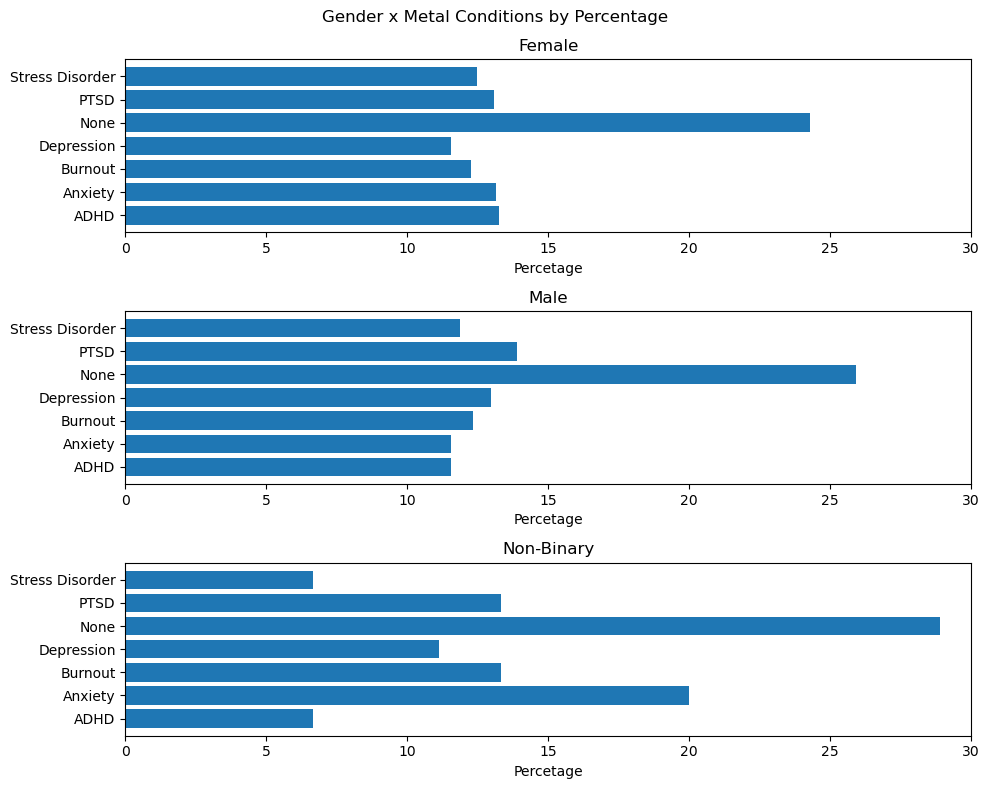

In [43]:
fig = plt.figure(figsize=(10,8))
fig.suptitle("Gender x Metal Conditions by Percentage")

ax1 = fig.add_subplot(3,1,1)
ax1.barh(female_conditions, female_percent)
ax1.set_title("Female")
ax1.set_xlabel("Percetage")
ax1.set_xlim(0,30)

ax2 = fig.add_subplot(3,1,2)
ax2.barh(male_conditions, male_percent)
ax2.set_title("Male")
ax2.set_xlabel("Percetage")
ax2.set_xlim(0,30)

ax3 = fig.add_subplot(3,1,3)
ax3.barh(nonbin_conditions, nonbin_percent)
ax3.set_title("Non-Binary")
ax3.set_xlabel("Percetage")
ax3.set_xlim(0,30)

plt.tight_layout()
plt.show()

It may be a product of the smaller sample size, but it does appear that non-binary workers see a disproportionatly higher occurence of anxiety vs males and females. Males and females have very similar condition profiles. 

### Gender vs working situation
Do the listed gender categories have any difference in their percentage of those who are onsite, hybrid and remote?

In [44]:
cyber_table.print_columns()


Printing columns
Index: 0, Name: Survey_Date, Data Type: date, Unlocked: True, Longest value: 11
Index: 1, Name: Age, Data Type: int, Unlocked: True, Longest value: 3
Index: 2, Name: Gender, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 3, Name: Region, Data Type: string, Unlocked: True, Longest value: 6, Is Category: False, Categories: {}
Index: 4, Name: Industry, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 5, Name: Job_Role, Data Type: string, Unlocked: True, Longest value: 8, Is Category: False, Categories: {}
Index: 6, Name: Work_Arrangement, Data Type: string, Unlocked: True, Longest value: 16, Is Category: False, Categories: {}
Index: 7, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 8, Name: Mental_Health_Status, Data Type: string, Unlocked: True, Longest value: 20, Is Category: False, Categories: {}
Index: 9, Name: Burnout_Level, Data Type: string

In [45]:
gender_arrangement = cyber_table.aggregate(reference_column_indexes=[6, 2], command_dict={0:"row_counts"})
gender_groups = gender_arrangement.return_groups(column_indexes=[1])
gender_groups.add_batch_row_calculations(g_reference_column_index=2, g_calculation="percentage_of_total")
gender_aggregated = gender_groups.merge_into_cyber_table()
gender_aggregated.print()


Printing all rows
Work_Arrangement |       Gender      |  Survey_Date_row_counts |  calculated_percentage_of_total
------------------------------------------------------------------------------------------------
Hybrid           | Female            |                    454 |             30.266666666666666
Onsite           | Female            |                    772 |              51.46666666666667
Remote           | Female            |                    274 |             18.266666666666666
Hybrid           | Male              |                    510 |              33.22475570032573
Onsite           | Male              |                    732 |              47.68729641693811
Remote           | Male              |                    293 |             19.087947882736156
Hybrid           | Non-binary        |                     32 |              35.55555555555556
Onsite           | Non-binary        |                     44 |             48.888888888888886
Remote           | Non-bina

In [46]:
onsite = gender_aggregated.return_sub_table_by_row_filters(column_indexes=[0], values=["Onsite"])
onsite_gender = onsite.return_column_data(1)
onsite_percentage = onsite.return_column_data(3)

hybrid = gender_aggregated.return_sub_table_by_row_filters(column_indexes=[0], values=["Hybrid"])
hybrid_gender = hybrid.return_column_data(1)
hybrid_percentage = hybrid.return_column_data(3)

remote = gender_aggregated.return_sub_table_by_row_filters(column_indexes=[0], values=["Remote"])
remote_gender = remote.return_column_data(1)
remote_percentage = remote.return_column_data(3)

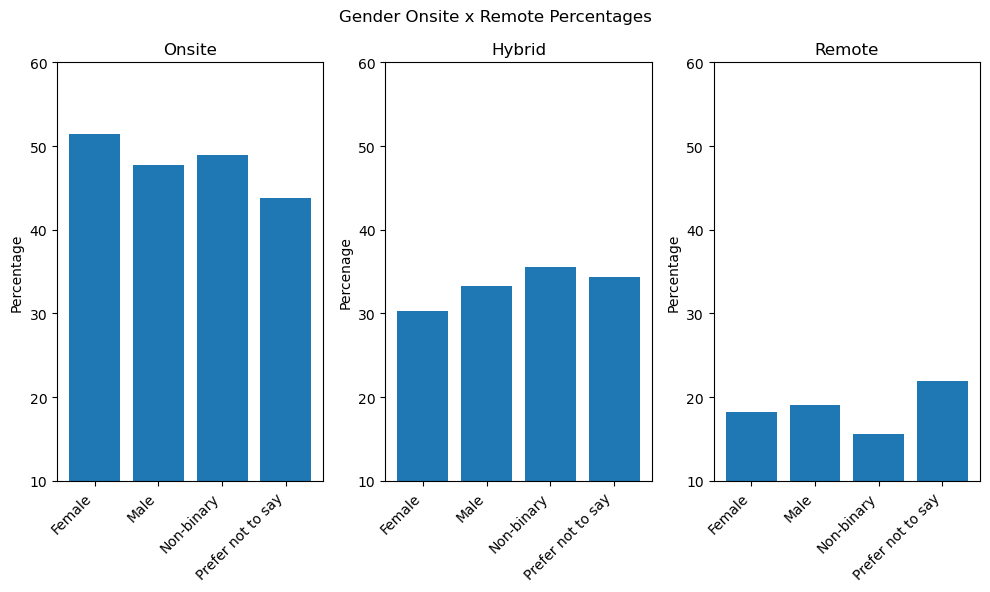

In [47]:
figure = plt.figure(figsize=(10,6))
figure.suptitle("Gender Onsite x Remote Percentages")

ax1 = figure.add_subplot(1,3,1)
ax1.bar(onsite_gender, onsite_percentage)
ax1.set_title("Onsite")
ax1.set_ylabel("Percentage")
ax1.set_ylim(10, 60)
plt.xticks(rotation=45, ha='right')

ax2 = figure.add_subplot(1,3,2)
ax2.bar(hybrid_gender, hybrid_percentage)
ax2.set_title("Hybrid")
ax2.set_ylabel("Percenage")
ax2.set_ylim(10, 60)
plt.xticks(rotation=45, ha='right')

ax3 = figure.add_subplot(1,3,3)
ax3.bar(remote_gender, remote_percentage)
ax3.set_title("Remote")
ax3.set_ylabel("Percentage")
ax3.set_ylim(10, 60)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

It does not appear that male, female or non-binary workers have a disproportionate percentage of working arrangements. Non-binary workers make up a much smaller sample size in the data so the differences may be due to a smaller data pool. 

### Industry vs working situation
Do industries have a predisposition to be more onsite, hybrid or remote?

In [48]:
remote_by_industry = cyber_table.aggregate(reference_column_indexes=[4, 6], command_dict={0:"row_counts"})
industry_groups = remote_by_industry.return_groups(column_indexes=[0])
industry_groups.add_batch_row_calculations(g_reference_column_index=2, g_calculation="percentage_of_total")
industry_aggregated = industry_groups.merge_into_cyber_table()
industry_aggregated.print()


Printing all rows
      Industry       |  Work_Arrangement |  Survey_Date_row_counts |  calculated_percentage_of_total
----------------------------------------------------------------------------------------------------
Customer Service      | Hybrid           |                     48 |              27.74566473988439
Customer Service      | Onsite           |                     98 |              56.64739884393064
Customer Service      | Remote           |                     27 |             15.606936416184972
Education             | Hybrid           |                     71 |             24.738675958188153
Education             | Onsite           |                    170 |              59.23344947735192
Education             | Remote           |                     46 |              16.02787456445993
Finance               | Hybrid           |                    104 |             28.337874659400548
Finance               | Onsite           |                    210 |              57.22

In [49]:
industry_onsite = industry_aggregated.return_sub_table_by_row_filters(column_indexes=[1], values=["Onsite"])
industry_hybrid = industry_aggregated.return_sub_table_by_row_filters(column_indexes=[1], values=["Hybrid"])
industry_remote = industry_aggregated.return_sub_table_by_row_filters(column_indexes=[1], values=["Remote"])

industry_onsite_industry = industry_onsite.return_column_data(0)
industry_onsite_percent = industry_onsite.return_column_data(3)

industry_hybrid_industry = industry_hybrid.return_column_data(0)
industry_hybrid_percent = industry_hybrid.return_column_data(3)

industry_remote_industry = industry_remote.return_column_data(0)
industry_remote_percent = industry_remote.return_column_data(3)

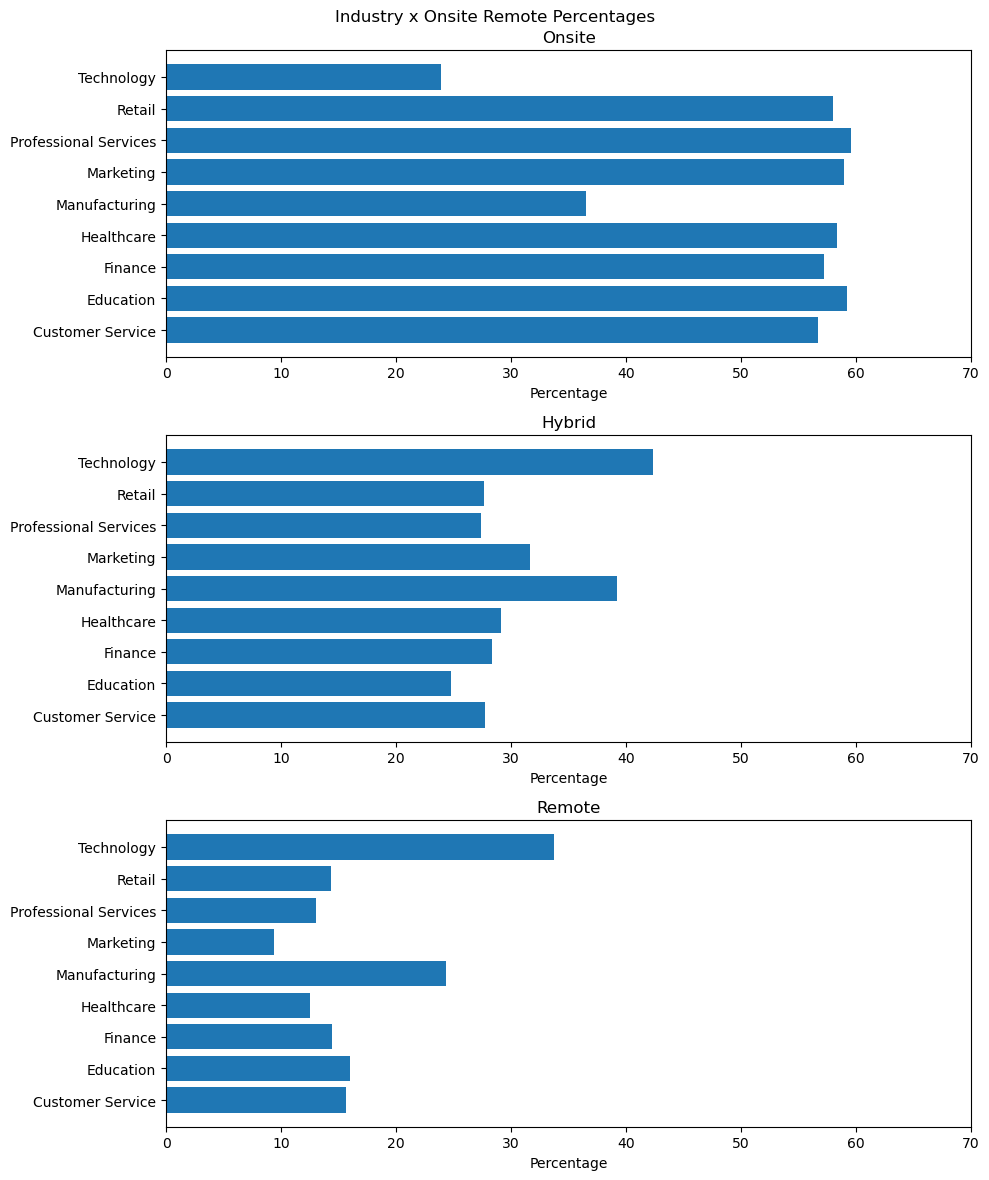

In [50]:
figure = plt.figure(figsize=(10,12))
figure.suptitle("Industry x Onsite Remote Percentages")

ax1 = figure.add_subplot(3,1,1)
ax1.barh(industry_onsite_industry, industry_onsite_percent)
ax1.set_xlabel("Percentage")
ax1.set_xlim(0,70)
ax1.set_title("Onsite")

ax2 = figure.add_subplot(3,1,2)
ax2.barh(industry_hybrid_industry, industry_hybrid_percent)
ax2.set_xlabel("Percentage")
ax2.set_xlim(0,70)
ax2.set_title("Hybrid")

ax3 = figure.add_subplot(3,1,3)
ax3.barh(industry_remote_industry, industry_remote_percent)
ax3.set_xlabel("Percentage")
ax3.set_xlim(0,70)
ax3.set_title("Remote")

plt.tight_layout()
plt.show()

Technology and manufacturing companies employ a greater proportion of fully remote workers. Fully remote workers feel more socially isolated than workers who spent some time in the office. This may imply that in the technology and manufacturing industries, there are a greater proportion of socially isolated workers than others. 

### Industry vs burnout
Are some industries prone to burnout more than others?

In [51]:
industry_burnout = cyber_table.aggregate(reference_column_indexes=[4, 9], command_dict={0:"row_counts"})
industry_groups = industry_burnout.return_groups(column_indexes=[0])
industry_groups.add_batch_row_calculations(g_reference_column_index=2, g_calculation="percentage_of_total")
indsutry_burnout_aggregated = industry_groups.merge_into_cyber_table()
indsutry_burnout_aggregated.order_rows_by_column(1)
indsutry_burnout_aggregated.print()


Printing all rows
      Industry       |  Burnout_Level |  Survey_Date_row_counts |  calculated_percentage_of_total
-------------------------------------------------------------------------------------------------
Customer Service      | Low           |                     36 |             20.809248554913296
Education             | Low           |                     83 |               28.9198606271777
Finance               | Low           |                     74 |              20.16348773841962
Healthcare            | Low           |                     61 |             24.696356275303643
Manufacturing         | Low           |                     80 |              21.62162162162162
Marketing             | Low           |                     46 |             22.772277227722775
Professional Services | Low           |                    191 |             26.164383561643834
Retail                | Low           |                     50 |             26.595744680851062
Technology       

In [52]:
industry_burnout_regrouped = indsutry_burnout_aggregated.return_groups(column_indexes=[0])

burnout_categories = industry_burnout_regrouped.groups[0].return_column_data(1)

customer_service = industry_burnout_regrouped.groups[0].return_column_data(3)
education = industry_burnout_regrouped.groups[1].return_column_data(3)
finance = industry_burnout_regrouped.groups[2].return_column_data(3)
health = industry_burnout_regrouped.groups[3].return_column_data(3)
manufacturing = industry_burnout_regrouped.groups[4].return_column_data(3)
markting = industry_burnout_regrouped.groups[5].return_column_data(3)
professionals = industry_burnout_regrouped.groups[6].return_column_data(3)
retail = industry_burnout_regrouped.groups[7].return_column_data(3)
tech = industry_burnout_regrouped.groups[8].return_column_data(3)


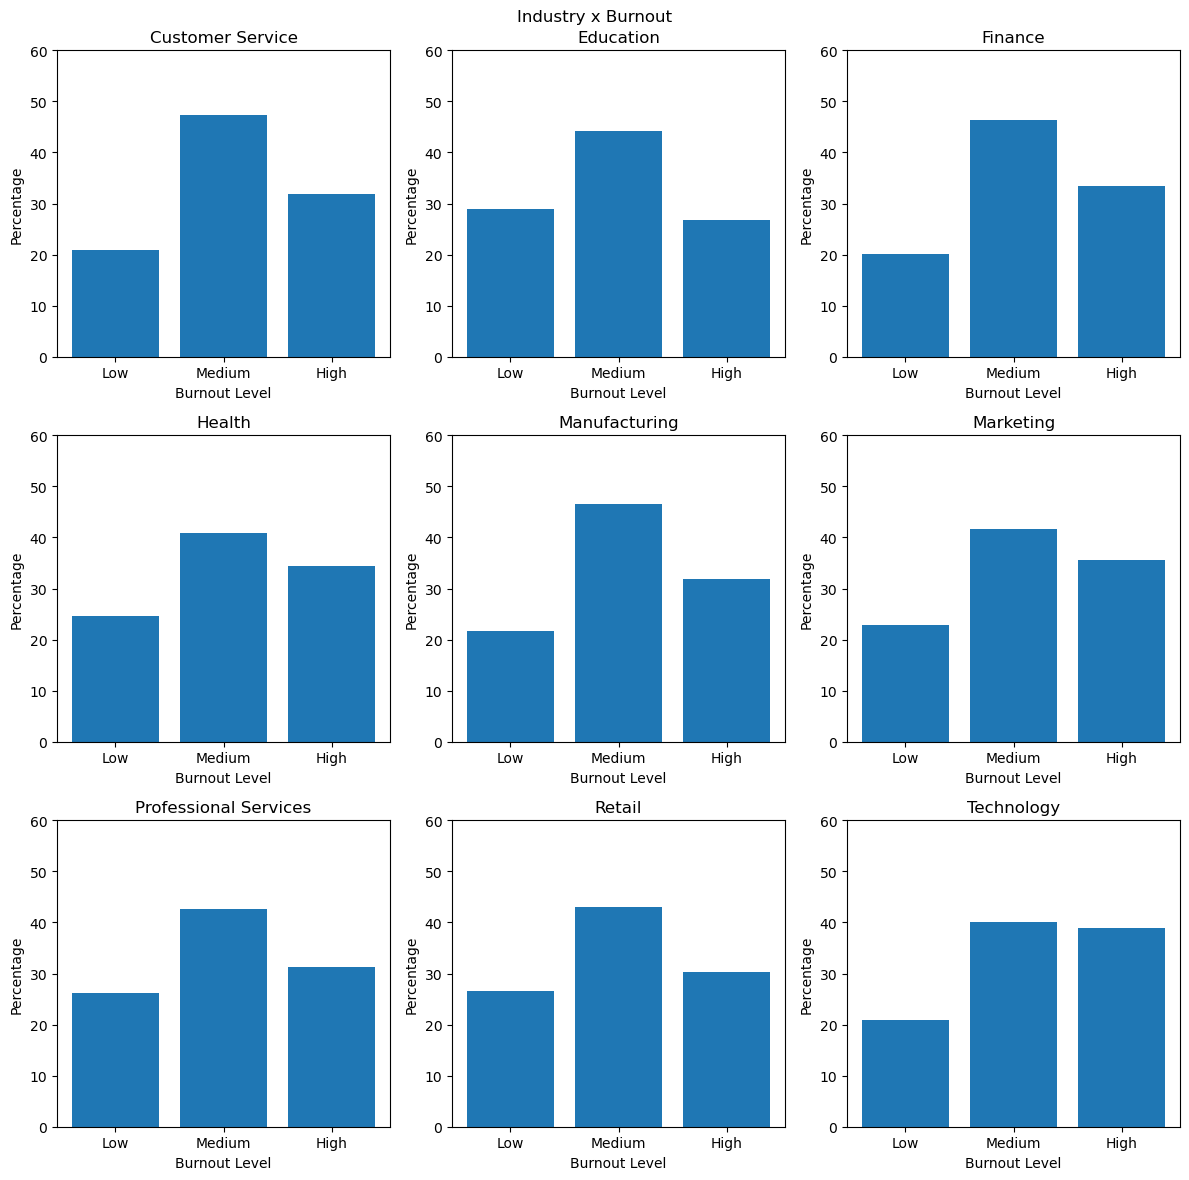

In [53]:
figure = plt.figure(figsize=(12,12))
figure.suptitle("Industry x Burnout")

ax1 = figure.add_subplot(3,3,1)
ax1.bar(burnout_categories, customer_service)
ax1.set_title("Customer Service")
ax1.set_ylabel("Percentage")
ax1.set_xlabel("Burnout Level")
ax1.set_ylim(0,60)

ax2 = figure.add_subplot(3,3,2)
ax2.bar(burnout_categories, education)
ax2.set_title("Education")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Burnout Level")
ax2.set_ylim(0,60)

ax3 = figure.add_subplot(3,3,3)
ax3.bar(burnout_categories, finance)
ax3.set_title("Finance")
ax3.set_ylabel("Percentage")
ax3.set_xlabel("Burnout Level")
ax3.set_ylim(0,60)

ax4 = figure.add_subplot(3,3,4)
ax4.bar(burnout_categories, health)
ax4.set_title("Health")
ax4.set_ylabel("Percentage")
ax4.set_xlabel("Burnout Level")
ax4.set_ylim(0,60)

ax5 = figure.add_subplot(3,3,5)
ax5.bar(burnout_categories, manufacturing)
ax5.set_title("Manufacturing")
ax5.set_ylabel("Percentage")
ax5.set_xlabel("Burnout Level")
ax5.set_ylim(0,60)

ax6 = figure.add_subplot(3,3,6)
ax6.bar(burnout_categories, markting)
ax6.set_title("Marketing")
ax6.set_ylabel("Percentage")
ax6.set_xlabel("Burnout Level")
ax6.set_ylim(0,60)

ax7 = figure.add_subplot(3,3,7)
ax7.bar(burnout_categories, professionals)
ax7.set_title("Professional Services")
ax7.set_ylabel("Percentage")
ax7.set_xlabel("Burnout Level")
ax7.set_ylim(0,60)

ax8 = figure.add_subplot(3,3,8)
ax8.bar(burnout_categories, retail)
ax8.set_title("Retail")
ax8.set_ylabel("Percentage")
ax8.set_xlabel("Burnout Level")
ax8.set_ylim(0,60)

ax9 = figure.add_subplot(3,3,9)
ax9.bar(burnout_categories, tech)
ax9.set_title("Technology")
ax9.set_ylabel("Percentage")
ax9.set_xlabel("Burnout Level")
ax9.set_ylim(0,60)

plt.tight_layout()
plt.show()


Most industries have similar burnout profiles, while technology does have an abnormally high "High" percentage. Health and marketing are also notable for how high the "High" value is. 

### Money and work life balance?
As working hours slightly correlates with a better work life balance, does someone's income affect work life balance score?

In [54]:
money_hours_wlb = cyber_table.return_sub_table_by_columns(column_indexes=[7, 10, 13])
money_hours_wlb.top(10)



Printing top 10 rows
Hours_Per_Week |  Work_Life_Balance_Score |  Salary_Range
---------------------------------------------------------
            64 |                       3 | $40K-60K    
            37 |                       4 | $80K-100K   
            36 |                       3 | $80K-100K   
            63 |                       1 | $60K-80K    
            65 |                       5 | $60K-80K    
            61 |                       4 | $60K-80K    
            62 |                       4 | $80K-100K   
            55 |                       3 | $100K-120K  
            47 |                       2 | $60K-80K    
            55 |                       5 | $60K-80K    


In [55]:
money_hours_wlb.insert_column("salary_start")

3

In [63]:
for idx, row in money_hours_wlb.rows.items():
    items = row.get_items()
    value = items[2]
    money = str(value).split("-")[0][1:-1]
    money = money.replace("K", "")
    items[3] = money
    money_hours_wlb.update_row(idx, items)
money_hours_wlb.analyse_columns()
money_hours_wlb.print_columns()


Printing columns
Index: 0, Name: Hours_Per_Week, Data Type: int, Unlocked: True, Longest value: 14
Index: 1, Name: Work_Life_Balance_Score, Data Type: int, Unlocked: True, Longest value: 23
Index: 2, Name: Salary_Range, Data Type: string, Unlocked: True, Longest value: 12, Is Category: False, Categories: {}
Index: 3, Name: salary_start, Data Type: int, Unlocked: True, Longest value: 12


In [66]:
money_hours_wlb.top(5)


Printing top 5 rows
Hours_Per_Week |  Work_Life_Balance_Score |  Salary_Range |  salary_start
-------------------------------------------------------------------------
            64 |                       3 | $40K-60K     |           40
            37 |                       4 | $80K-100K    |           80
            36 |                       3 | $80K-100K    |           80
            63 |                       1 | $60K-80K     |           60
            65 |                       5 | $60K-80K     |           60


In [73]:
money_x_work_life_balance = money_hours_wlb.return_correlation_coefficient(column_indexes=[1, 3])
money_x_hours = money_hours_wlb.return_correlation_coefficient(column_indexes=[0, 3])

print(f"Money x Work life balance coefficient: {money_x_work_life_balance}")
print(f"Money x hours coefficient: {money_x_hours}")


Money x Work life balance coefficient: 0.010004137305530883
Money x hours coefficient: 0.03132188124905138


It would not appear that salary has any noticeable correlation with either hours worked or with work life balance. 

### Summary and key findings
1. The more remote someone's position, the more socially isolated they feel, regardless of gender
2. Each gender is no more likely to work remotely, onsite or hybrid than any other in any significant way
3. Males and females have no difference in mental health conditions
4. Number of physical health conditions was not a visible factor in someone's level of social isolation
5. Someone's number of hours worked didn't affect their level of burnout or work-life balance in any visible way
6. Mental health conditions or burnout level were not indicators of someone's level of social isolation
7. People who worked more remotely across all mental health conditions reported greater levels of social isolation
8. The technology and manufacturing industries employ a greater percentage of fully remote workers vs other industries
9. Burnout is most noticeable in the technology, health and marketing industries
10. Salary does not appear to be correlated with hours worked or with work life balance